#### Machine Learning

##### ¿What is machine learning?
Machine learning is a sub-field of computer science and artificial intelligence that uses data and algorithms to imitate the way that humans learn gradually improving its accuracy.

##### ¿Where is machine learning used?

- **Image recognition** for example, Facebook uses machine learning to recognize faces in photos.
- **Speech recognition** for example, Siri uses machine learning to recognize your voice and improve its ability to understand you.
- **Medical diagnosis** for example, machine learning is used to detect cancer cells in blood samples.
- **Statistical arbitrage** for example, machine learning is used to predict the price of stocks.
- **Suggestions content** for example, machine learning is used to suggest what you should buy or watch next on Netflix.
- **Fraud detection** for example, machine learning is used to detect unusual patterns in credit card transactions.
- **Translation** for example, Google uses machine learning to translate text from one language to another.
- **Robot locomotion** for example, machine learning is used to teach robots how to walk.
- **Self-driving cars** for example, machine learning is used to avoid accidents.
- etc.


#### Supervised learning
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.

| Input  | Output | Application |
| ------------- | ------------- | ------------- |
| Email  | Spam or not spam | Email spam classification |
| Audio  | Text transcript | Speech recognition |
| English | Chinese | Machine translation |
| Image | Object in the image | Object recognition |
| ad, user info | click or not | Click prediction |
| etc. | etc. | etc. |

##### Regression
Regression is a set of statistical processes for estimating the relationships between a dependent variable ( often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates' or 'features'). Regression  predict continuous value outputs (e.g. price, weight).

##### Classification
Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations whose category membership is known. Classification predict discrete value outputs (e.g. spam or not spam, cat or dog, etc.).



#### Unsupervised Learning 
Unsupervised learning is the machine learning task of inferring a function to describe hidden structure from "unlabeled" data ( a classification or categorization is not included in the observations ).

##### Clustering
Clustering is task of grouping similar data points together.

##### Anomaly detection
Anomaly detection is find unusual patterns that do not conform to expected behavior.

##### Dimensionality reduction
Dimensionality reduction is the process of reducing data while losing as little information as possible.


#### Regression Model

The regression model is probably the most used model in machine learning. It is used to predict continuous value outputs (e.g. price, weight).

**how to represent function $h$ or $f$?**

\begin{equation*}
  \begin{split}
    x -> f -> \hat{y} \\
    x -> f_w,_b -> \hat{y} \\
    x -> w*x + b -> \hat{y} \\
  \end{split}
\end{equation*}

 where $x$ is the input, $f$ is the function and $\hat{y}$ is the output.


 **Linear Regression** with one variable or single feature

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x_train is square feet: input data
# y_train is price: output data

x_train = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0, 6.0 , 7.0])
y_train = np.array([300.0, 500.0, 700.0, 900.0, 1100.0, 1300.0, 1500.0])

print(f"Number of training examples: {len(x_train)}") # or x_train.shape[0]

Number of training examples: 7


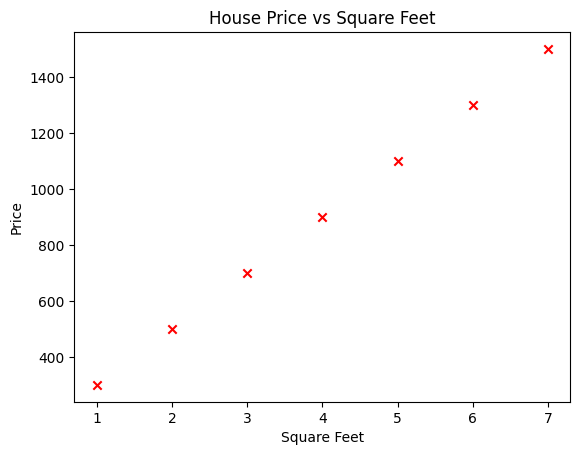

In [2]:
# Plot the data
plt.scatter(x_train, y_train, marker='x', c='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price vs Square Feet')
plt.show()


In [3]:
def compute_linear_model(x, w, b):
    """Compute the linear model y = w*x + b
    Args:
        x(ndarray (m,)): input data
        w (scalar): weight
        b (scalar): bias
    """
    m = len(x)
    f = np.zeros(m) # initialize the output with zise m
    for i in range(m):
        f[i] = w*x[i] + b
    return f


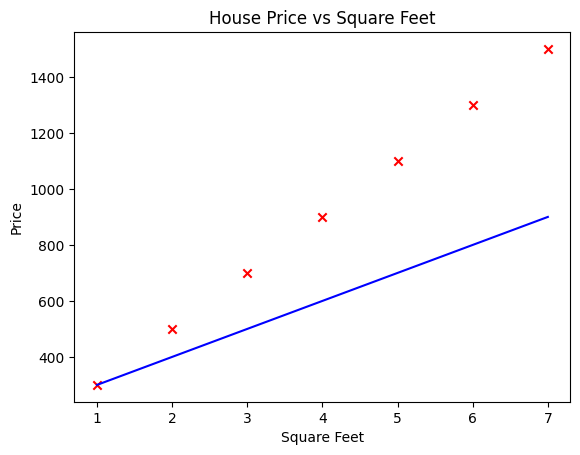

Price for 1.7 square feet is 370.0


In [4]:
# Initialize the weight and bias, this data is random just for this example 
w = 100
b = 200
y_hat = compute_linear_model(x_train, w, b)
# Plot the prediction data
plt.plot(x_train, y_hat, c='blue')
# plot the training data
plt.scatter(x_train, y_train, marker='x', c='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price vs Square Feet')
plt.show()
# cal the price
x_i = 1.7
price = w*x_i + b
print(f"Price for {x_i} square feet is {price}")

#### Cost Function
The cost function is a function that measures the performance of a machine learning model for given data. It quantifies the error between predicted values and expected.

**model** $f_w,_b(x) = w*x + b$,
for a given input $x_i$ the output is $\hat{y_i} = f_w,_b(x_i)$ 
for our model  is $f_w,_b(x_i) = w*x_i + b$

$w$ and $b$ are the parameters, coefficients or weights of the model.

**Find $w$, $b$**: $\hat{y_i}$ is close the true value $y_i$ for all $x_i$ in the training set. $distance$ = $\hat{y_i} - y_i$

**Cost function** The cost function in this case is the **mean squared error (MSE)** function and add a $\frac{1}{2}$ factor to simplify the derivative.

 $J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_w,_b(x_i) - y_i)^2$

 **Goal**: $minimize$ $J(w,b)$

In [5]:
def compute_cost(x, y, w, b):
    """Compute the cost function
    args:
        x (ndarray (m,)): predicted output
        y (ndarray (m,)): actual output
        w (scalar): weight
        b (scalar): bias
    return 
        total_cost (scalar): total cost
    """
    m = len(x)
    
    cost_total = 0
    for i in range(m):
        # compute the predicted output
        y_hat = w*x[i] + b
        # sumatory of the squared error
        cost_total += (y_hat - y[i])**2
        
    # divide by 2m
    cost_total = cost_total/(2*m)
    return cost_total
    

#### Gradient Descent

##### Optimize a regression model using gradient descent

Gradient descent is an optimization algorithm used to find the value of parameters (coefficients) of a function $f$ or $h$ that minimizes a cost function $J$.

**Gradient descent algorithm**

\begin{equation*}
  \begin{split}
    repeat \{ \\
    w := w - \alpha \frac{\partial}{\partial w} J(w,b) \\
    b := b - \alpha \frac{\partial}{\partial b} J(w,b) \\
    \} \\
  \end{split}
\end{equation*}


where, 
- $\alpha$ is the learning rate, step size or step length.
- $\frac{\partial}{\partial w} J(w,b)$ is the partial derivative of $J(w,b)$ with respect to $w$.
- $\frac{\partial}{\partial b} J(w,b)$ is the partial derivative of $J(w,b)$ with respect to $b$.

when $\alpha$ is too small, gradient descent can be slow and when $\alpha$ is too large gradiente descent can overshoot the minimum and may fail to converge.

**local minimum** is a point where the function is lower than all neighboring points, but not necessarily the lowest possible point in the entire function

**global minimum** is the lowest value of the function for all input values

**Calculate the partial derivatives**

\begin{equation*}
  \begin{split}
    \frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} (f_w,_b(x_i) - y_i) * x_i \\
    \frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} (f_w,_b(x_i) - y_i) \\
  \end{split}
\end{equation*}

In [15]:
def compute_gradient_descent(x, y, w, b, alpha):
    """Compute the gradient descent
    args:
        x (ndarray (m,)): predicted output
        y (ndarray (m,)): actual output
        w (scalar): weight
        b (scalar): bias
        alpha (scalar): learning rate
    return 
        w (scalar): weight
        b (scalar): bias
        cost (scalar): total cost
    """
    m = len(x)
    cost = compute_cost(x, y, w, b)
    
    d_w = 0
    d_b = 0
    # compute the partial derivatives
    for  i in range(m):
        y_hat = w*x[i] + b
        d_w = d_w + (y_hat - y[i])*x[i]
        d_b = d_b + (y_hat - y[i])
        
    # divide by m
    d_w = d_w/m
    d_b = d_b/m
    
    # update the weight and bias
    w = w - alpha*d_w
    b = b - alpha*d_b
    
    return w, b, cost
        
# test 
# compute_gradient_descent(x_train, y_train, 0, 0, 1.0e-2)    

In [18]:
def iter_gradient_descent(x, y, w, b, alpha, iterations):
    """Iterate the gradient descent
    args:
        x (ndarray (m,)): predicted output
        y (ndarray (m,)): actual output
        w (scalar): weight
        b (scalar): bias
        alpha (scalar): learning rate
        iterations (int): number of iterations
    return 
        w (scalar): weight
        b (scalar): bias
        cost (scalar): total cost
    """
    history = []
    for i in range(iterations):
        w, b, cost = compute_gradient_descent(x, y, w, b, alpha)
        
        if i % 1000 == 0:
            print(f"Iteration: {i}, cost: {cost}, w: {w}, b: {b}")
        history.append([w, b, cost])
    return w, b, cost, history
        

In [44]:
w_init = 0
b_init = 0
alpha = 0.000001
iterations = 200000
w, b, cost, history = iter_gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)
print(f"final parameters: w: {w:8.4f}, b: {b:8.4f}, cost: {cost}")
y_hat = compute_linear_model(x_train, w, b)

Iteration: 0, cost: 485000.0, w: 0.004399999999999999, b: 0.0009
Iteration: 1000, cost: 465243.7269019404, w: 4.358870223991261, b: 0.8917045682764565
Iteration: 2000, cost: 446292.7520454914, w: 8.62362353741132, b: 1.764389409968839
Iteration: 3000, cost: 428114.24994185974, w: 12.800507488267082, b: 2.619327621222156
Iteration: 4000, cost: 410676.73313172016, w: 16.891331578029384, b: 3.4568846150251633
Iteration: 5000, cost: 393949.9976445861, w: 20.897868045124607, b: 4.277418279429535
Iteration: 6000, cost: 377905.0706813572, w: 24.82185263229255, b: 5.08127913251077
Iteration: 7000, cost: 362514.1604294293, w: 28.664985338141282, b: 5.8688104741380185
Iteration: 8000, cost: 347750.6079234341, w: 32.428931153225754, b: 6.640348534618571
Iteration: 9000, cost: 333588.8408682271, w: 36.11532078096833, b: 7.396222620281225
Iteration: 10000, cost: 320004.3293441385, w: 39.7257513437332, b: 8.136755256061676
Iteration: 11000, cost: 306973.5433177638, w: 43.261787074360605, b: 8.862262

Text(0.5, 1.0, 'Cost vs Iterations')

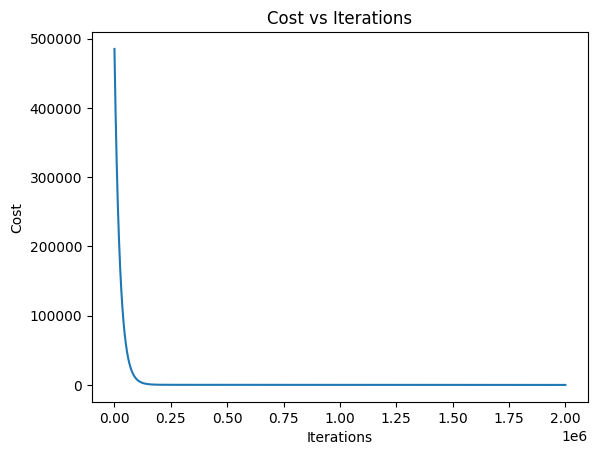

In [46]:
# plot the cost function
plt.plot([i for i in range(iterations)], [history[i][2] for i in range(iterations)])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

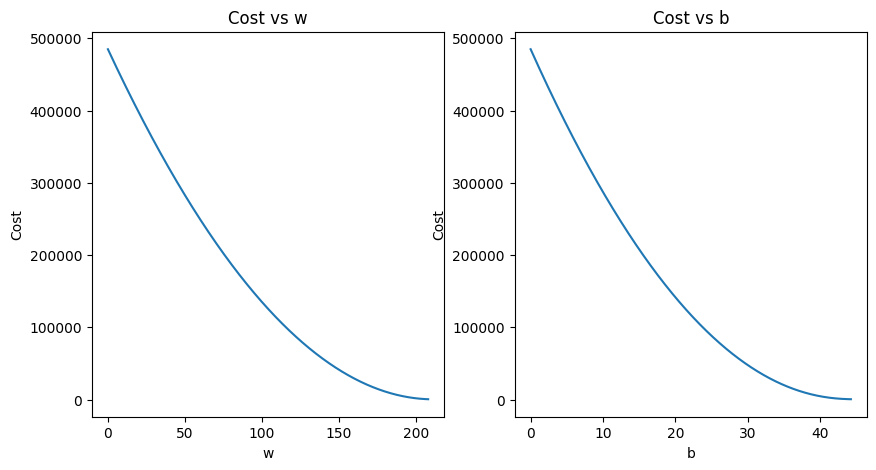

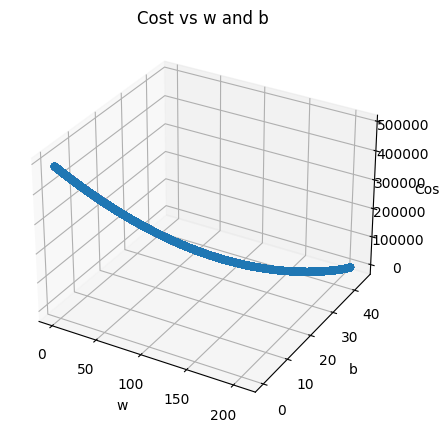

In [43]:
# plot the gradient descent in 3 parts: cost wiht w, const with b and in 3d cost with w and b
# plot the cost function with w
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot([history[i][0] for i in range(iterations)], [history[i][2] for i in range(iterations)])
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs w')
# plot the cost function with b
plt.subplot(1, 2, 2)
plt.plot([history[i][1] for i in range(iterations)], [history[i][2] for i in range(iterations)])
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs b')
# plot the cost function with w and b in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([history[i][0] for i in range(iterations)], [history[i][1] for i in range(iterations)], [history[i][2] for i in range(iterations)])
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.title('Cost vs w and b')
plt.show()



Text(0.5, 1.0, 'House Price vs Square Feet')

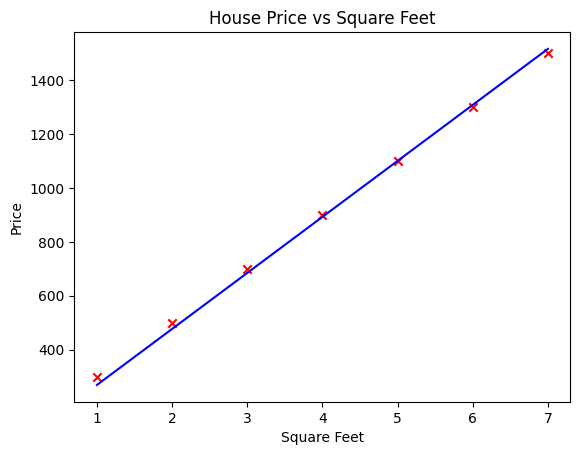

In [47]:
# plot the prediction data

plt.plot(x_train, y_hat, c='blue')
# plot the training data
plt.scatter(x_train, y_train, marker='x', c='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('House Price vs Square Feet')